In [7]:
import json 
with open('./Tweets.5000.fixed.json', 'r') as file:
    data = json.load(file)

In [10]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
texts = []
for j in list(data.values()):
    texts.append(j['text'])

texts_df = pd.DataFrame(texts, columns=['text'])
# texts_df.head()
#texts_df = pd.read_csv('./texts.csv')

In [11]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
texts = []
for j in list(data.values()):
     texts.append(j['text'])

#texts_df = pd.DataFrame(texts, columns=['text'])

In [12]:
texts_df.head()

,text
0,هدف من پیدا کردن ایران ستیزان بود که شما رو یافتم \r\nحالا شما از پشت لباس پادشاهی دوست بیا بیرون چون طرفداران پادشاهی… https://t.co/ZKXhxrtVZU
1,@reise_ghabile ظهر شمام بخیر
2,دوست پسر خلبان کجا میفروخن؟
3,@HoseinMr007 خب اونجا زندگی میکنیم
4,RT @debianstable1: صبحا که میخوان منو از خواب بیدار کنن... https://t.co/ZOLx1KOqTW


In [13]:
import re
import swifter
from hazm import Normalizer
import string
persianRegex = r"^[\u0600-\u06FF\uFB8A\u067E\u0686\u06AF\u200C\u200F ]+$"
emoji_unicode = r"[\U0001F300-\U0001F9FF]"
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\.\S+|(\S\.com)+','', text)
    text = re.sub(r"[^\u0621-\u0628\u062A-\u063A\u0641-\u0642\u0644-\u0648\u064E-\u0651\u0655\u067E\u0686\u06A9\u06AF\u06BE\u06CC\u200C\u200F]+$/", '', text)
    text = re.sub(r'[ ]{2,}', ' ', text)
    text = re.sub(r'@[\w]+', '', text)
    text = re.sub(r'(rt :)+|[؟.!="،]+|[@\r\n\t()*&^\%$!:…rt]+', '', text)
    text = re.sub(r'[#_]+', ' ', text)
    text = re.sub(emoji_unicode, '', text)
    text = re.sub(r'آقامحسن{1,}', 'آقا محسن', text)
    # normalize=Normalizer()
    # text = normalize.normalize(text)
    return text.strip()
    
texts_df['preprocess_texts'] =texts_df['text'].swifter.apply(preprocess_text)

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

In [14]:
texts_df.head()

,text,preprocess_texts
0,هدف من پیدا کردن ایران ستیزان بود که شما رو یافتم \r\nحالا شما از پشت لباس پادشاهی دوست بیا بیرون چون طرفداران پادشاهی… https://t.co/ZKXhxrtVZU,هدف من پیدا کردن ایران ستیزان بود که شما رو یافتم حالا شما از پشت لباس پادشاهی دوست بیا بیرون چون طرفداران پادشاهی
1,@reise_ghabile ظهر شمام بخیر,ظهر شمام بخیر
2,دوست پسر خلبان کجا میفروخن؟,دوست پسر خلبان کجا میفروخن
3,@HoseinMr007 خب اونجا زندگی میکنیم,خب اونجا زندگی میکنیم
4,RT @debianstable1: صبحا که میخوان منو از خواب بیدار کنن... https://t.co/ZOLx1KOqTW,صبحا که میخوان منو از خواب بیدار کنن


 null entries after preprocesing was 7 

In [15]:
def remove_empty_rows(df : pd.DataFrame) -> pd.DataFrame:
    print(f"Number of rows before removing empty rows: {len(df)}")
    df = df[df['preprocess_texts'].str.strip() != '']
    print(f"Number of rows after removing empty rows: {len(df)}")
    print(f"Number of null entries: {df['preprocess_texts'].isnull().sum()}")
    df.dropna(subset=['text' , 'preprocess_texts'],inplace=True)
    df.reset_index(drop=True, inplace=True)
    print(f"Number of after removing null entries: {len(df)}")
    return df

texts_df = remove_empty_rows(texts_df)
len(texts_df)

Number of rows before removing empty rows: 5000
Number of rows after removing empty rows: 4993
Number of null entries: 0
Number of after removing null entries: 4993


/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_77637/851185038.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['text' , 'preprocess_texts'],inplace=True)


4993

In [10]:
texts_df['preprocess_texts'][4983]

'داداشش بود'

In [ ]:
#texts_df['preprocess_texts'].to_csv('./Normilized_preprocessed_2.csv')
# thois is with removing `rt` form

after seeing vocaulary of dataframe  and some tokens like فرزانگان+ or '''  vocalunalry number from 13879 decareased to   decided to remove punctuations


In [16]:
import string, re
def remove_punctuation(text):
    text = re.sub(rf'[{string.punctuation}]', '', text)
    return text

texts_df['preprocess_texts'] = texts_df['preprocess_texts'].apply(remove_punctuation)

The dataset contains a variety of Unicode symbols, emojis, and special characters that may not be relevant for text processing tasks (e.g., NLP, sentiment analysis, or search indexing). These include:

Emojis (♥️, ✨, ✅, ⭕️, etc.)

Unicode symbols (☁️, ☘️, ⚜, ‼️, etc.)

East Asian characters (灿烈, 찬열, チャニョル, etc.)

Excessive punctuation (❌❌❌, ❤❤❤❤❤❤, ✨✨, etc.)

Zalgo/text modifiers (ꪔ̤̮, ﯾک, etc.)

Flag emojis (🇲🇺, 🇺🇸, etc.)

These elements can introduce noise in text analysis and should be removed while preserving meaningful text (e.g., Persian/Arabic words).




In [17]:
import pandas as pd
import re

def filter_rows_with_symbols(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """
    Filters rows containing symbols/emojis/Asian chars in a DataFrame column.
    
    Args:
        df: Input DataFrame.
        column_name: Name of the column to check.
    
    Returns:
        DataFrame: Rows where the column contains target symbols.
    """
    # Define the symbol regex (adjust as needed)
    symbol_pattern = re.compile(
        r'['
        r'\U0001F600-\U0001F64F'  # Emoticons
        r'\U0001F300-\U0001F5FF'  # Symbols & pictographs
        r'\U0001F680-\U0001F6FF'  # Transport & map symbols
        r'\u4E00-\u9FFF'          # Chinese
        r'\uAC00-\uD7AF'          # Korean
        r'\u3040-\u309F\u30A0-\u30FF'  # Japanese
        #r'\u200D\u200E\u200F\u202A-\u202E'  # Invisible formatting
        r']'
    )
    
    # Create a mask for rows with symbols
    mask = df[column_name].astype(str).str.contains(symbol_pattern, regex=True)
    
    # Return filtered rows
    return df[mask]

mask_of_symbols = filter_rows_with_symbols(texts_df, 'preprocess_texts')
mask_of_symbols

,text,preprocess_texts
302,برای فنوار همه امادن~\r\n@layzhang @B_hundred_Hyun @weareoneEXO #EXO #엑소\r\n@exoonearewe,برای فنوار همه امادن exo 엑소
400,RT @zizi__j: خیلی بده اونی ک دوسش داری لجباز باشه ها\r\nاصن کلا لجبازی خیلی رو مخه\r\nپفففف\r\nCHANYEOL\r\n#엑소 #찬열\r\n@weareoneEXO\r\n@layzhang \r\n@B_hundred_H…,خیلی بده اونی ک دوسش داری لجباز باشه هااصن کلا لجبازی خیلی رو مخهپففففchanyeol 엑소 찬열
451,RT @real__saqar: اریزز\r\nاین اکانت دوممه @itssqr_\r\nحقیقتا خودم تازه متوجه وجودش شدم\r\nفالوش کنید بک میدم:)❤\r\nCHANYEOL \r\n#찬열 @weareoneEXO \r\n@B_hund…,اریززاین اکانت دوممه حقیقتا خودم تازه متوجه وجودش شدمفالوش کنید بک میدم❤chanyeol 찬열
490,RT @yesheol: واسه چن هشتگ میزنین ؟تی الم یا کسی نمیزنه یا مال چند ساعت بپیشه \r\n\r\nCHEN BEAUTIFUL GOODBYE 280M\r\n\r\n#EXO #엑소 @weareoneEXO\r\n#CHEN #첸…,واسه چن هشتگ میزنین تی الم یا کسی نمیزنه یا مال چند ساعت بپیشه chen beauiful goodbye 280m exo 엑소 chen 첸
540,RT @Saraloveexo1: بیوتیفول گودبای به ۲۸۰ میلیون استریم رسیده\r\nیه CHEN با این فرمت ریپ میکنید؟ 💫☁️\r\n\r\nCHEN BEAUTIFUL GOODBYE 280M\r\n\r\n#EXO #엑소 @we…,بیوتیفول گودبای به ۲۸۰ میلیون استریم رسیدهیه chen با این فرمت ریپ میکنید ☁️chen beauiful goodbye 280m exo 엑소
917,RT @loveshotE_XO: بچه ها لطفا بهم رای بدین خواهش میکنم\r\n\r\n#엑소 #EXO \r\n@weareoneEXO\r\n@layzhang\r\n@B_hundred_Hyun\r\nhttps://t.co/5yS1UnvsYN,بچه ها لطفا بهم رای بدین خواهش میکنم 엑소 exo
1060,RT @park_rasha: ولی جونگده حتی هشتگاشم ارامش داره و حس نسیم ملایم صبح و ک لای موهات می وزه میده\r\nCHEN BEAUTIFUL GOODBYE 280M\r\n\r\n#EXO #엑소 @wear…,ولی جونگده حتی هشتگاشم ارامش داره و حس نسیم ملایم صبح و ک لای موهات می وزه میدهchen beauiful goodbye 280m exo 엑소
1078,RT @fatan_byt: دوست دارم خوشگله 🌸💘\r\n\r\n#CHANYEOL #찬열 #박찬열 #엑소찬열 @weareoneEXO https://t.co/j4EcN0PCIx,دوست دارم خوشگله chanyeol 찬열 박찬열 엑소찬열
1124,RT @ifzliweri: چرا حس میکنم این کامبک مثل آخرین کامبک گاتسون تو چی وای پی هست؟\r\nواسه همینم اسپیشال البومه😐\r\n#EXO #엑소 @weareoneEXO\r\n@B_hundred_…,چرا حس میکنم این کامبک مثل آخرین کامبک گاتسون تو چی وای پی هستواسه همینم اسپیشال البومه exo 엑소
1295,RT @saratymouri: اگه تو یه جمله این فرصت رو داشته باشین که حال آدمی که میدونین خوب نیست رو خوب کنید بهش چی میگین؟\r\n@GOT7Official\r\n#갓세븐 #GOT7…,اگه تو یه جمله این فرصت رو داشته باشین که حال آدمی که میدونین خوب نیست رو خوب کنید بهش چی میگین 갓세븐 go7


In [18]:
len(mask_of_symbols)

43

In [19]:
import pandas as pd

def count_asian_tokens(series: pd.Series) -> int:
    """
    Counts the number of tokens in a pandas Series that contain Asian characters.
    
    Args:
        series (pd.Series): A pandas Series where each element is a token (string).
        
    Returns:
        int: Number of tokens containing at least one Asian character.
    """
    # Define Unicode ranges for Asian scripts (Chinese, Japanese, Korean)
    asian_ranges = [
        (0x4E00, 0x9FFF),    # Chinese (CJK Unified Ideographs)
        (0x3040, 0x309F),    # Japanese Hiragana
        (0x30A0, 0x30FF),    # Japanese Katakana
        (0xAC00, 0xD7AF),    # Korean Hangul
        (0x1100, 0x11FF),    # Hangul Jamo
        (0x3130, 0x318F),    # Hangul Compatibility Jamo
        (0x31F0, 0x31FF),    # Katakana Phonetic Extensions
        (0xFF65, 0xFF9F),    # Halfwidth Katakana
        (0x3400, 0x4DBF),    # CJK Extension A
        (0x20000, 0x2A6DF),  # CJK Extension B
    ]
    
    def _contains_asian_char(token: str) -> bool:
        """Helper function to check if a token contains any Asian character."""
        return any(
            any(start <= ord(char) <= end for (start, end) in asian_ranges)
            for char in str(token)  # Ensure token is a string
        )
    
    # Apply the check to each token in the Series
    asian_token_mask = series.apply(_contains_asian_char)
    
    # Return the count of True values
    return asian_token_mask.sum()

asian_token_count = texts_df['preprocess_texts'].apply(lambda x: count_asian_tokens(pd.Series(x.split()))).sum()
asian_token_count

69

there is 69 token as asian chars so they noise we should remove them  

In [20]:
import re
import re
import re

def clean_text(text):
    """
    Removes emojis, symbols, and special characters EXCEPT Persian/Arabic and \u200C.
    """
    pattern = re.compile(
        r'['
        # Emojis and symbols (removed)
        r'\U0001F600-\U0001F64F'  # Emoticons
        r'\U0001F300-\U0001F5FF'  # Symbols & pictographs
        r'\U0001F680-\U0001F6FF'  # Transport & map symbols
        r'\U0001F700-\U0001F77F'  # Alchemical symbols
        r'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
        r'\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
        r'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
        r'\U0001FA00-\U0001FA6F'  # Chess Symbols
        r'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
        r'\U00002702-\U000027B0'  # Dingbats
        r'\U000024C2-\U0001F251'  # Enclosed characters
        r'\U0001F004-\U0001F0CF'  # Mahjong tiles
        r'\U0001F170-\U0001F251'  # Enclosed ideographs
        r'\u2000-\u200B\u200D-\u2FFF'  # General punctuation (EXCLUDES \u200C)
        r'\u3000-\u303F'  # CJK symbols and punctuation
        r'\uFE00-\uFEFF\uFF00-\uFFEF'  # Halfwidth and Fullwidth forms
        r'\u20D0-\u20FF\u25A0-\u25FF'  # Combining marks & geometric shapes
        r'\u2190-\u21FF\u2600-\u26FF'  # Arrows & misc symbols
        r'\u2700-\u27BF\u2B00-\u2BFF'  # Dingbats & misc symbols
        r'\U0001F1E0-\U0001F1FF'  # Flags (country codes)
        r'\U0001F3FB-\U0001F3FF'  # Emoji skin tones
        # East Asian scripts (removed)
        r'\u4E00-\u9FFF'  # Chinese
        r'\uAC00-\uD7AF'  # Korean
        r'\u3040-\u309F\u30A0-\u30FF'  # Japanese
        # Invisible formatting (removed, EXCEPT \u200C)
        r'\u200E\u200F\u202A-\u202E'  # Bidi controls
        r'\u00A0\u1680\u2000-\u200F\u2028-\u202F\u205F\u2060\u3000\uFEFF'  # Spaces/formatting
        r']+'
    )
    return re.sub(pattern, '', text)
texts_df['preprocess_texts_no_symboll'] = texts_df['preprocess_texts'].apply(clean_text)

In [21]:
texts_df.head()

,text,preprocess_texts,preprocess_texts_no_symboll
0,هدف من پیدا کردن ایران ستیزان بود که شما رو یافتم \r\nحالا شما از پشت لباس پادشاهی دوست بیا بیرون چون طرفداران پادشاهی… https://t.co/ZKXhxrtVZU,هدف من پیدا کردن ایران ستیزان بود که شما رو یافتم حالا شما از پشت لباس پادشاهی دوست بیا بیرون چون طرفداران پادشاهی,هدف من پیدا کردن ایران ستیزان بود که شما رو یافتم حالا شما از پشت لباس پادشاهی دوست بیا بیرون چون طرفداران پادشاهی
1,@reise_ghabile ظهر شمام بخیر,ظهر شمام بخیر,ظهر شمام بخیر
2,دوست پسر خلبان کجا میفروخن؟,دوست پسر خلبان کجا میفروخن,دوست پسر خلبان کجا میفروخن
3,@HoseinMr007 خب اونجا زندگی میکنیم,خب اونجا زندگی میکنیم,خب اونجا زندگی میکنیم
4,RT @debianstable1: صبحا که میخوان منو از خواب بیدار کنن... https://t.co/ZOLx1KOqTW,صبحا که میخوان منو از خواب بیدار کنن,صبحا که میخوان منو از خواب بیدار کنن


In [22]:
from hazm import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

tokens = texts_df['preprocess_texts_no_symboll'].apply(tokenize_text)
texts_df['tokens'] = tokens


In [1]:
import pandas as pd
from ast import literal_eval
#texts_df.to_csv('./texts_df_2.csv', index=False)
texts_df = pd.read_csv('./texts_df_2.csv')
texts_df['tokens'] = texts_df['tokens'].apply(literal_eval)


In [4]:
print(f"after pre: {texts_df['tokens'][4876]}")
print(f"before pre: {texts_df['text'][4976]}")

after pre: ['رناتو', 'سانچز', 'و', 'رافائل', 'لیائو', 'و', 'اینهام', 'هستن']
before pre: RT @Bahrami76S: می‌ترسید مثه خائنای قوه ی قضاییه محاکمه بشین که انقد به تکاپو افتادید😏
#رئيسی_بیا


In [5]:
from hazm.utils import stopwords_list
stopwords = stopwords_list()

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

texts_df['tokens_no_stopwords'] = texts_df['tokens'].apply(remove_stopwords)

In [7]:
train_transactions = texts_df['tokens_no_stopwords'].sample(frac=.80)
test_transactions = texts_df['tokens_no_stopwords'].drop(train_transactions.index)

In [38]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(train_transactions).transform(train_transactions)
vocabulary = pd.DataFrame(te_ary, columns=te.columns_)
# Step 2: Generate frequent itemsets
frequent_itemsets = apriori(vocabulary, min_support=.025, use_colnames=True)
# Step 3: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=.6)

In [39]:
print(len(rules))
(rules).head(50)

153


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(آقا),(اقدام),0.038558,0.038808,0.027041,0.701299,18.070884,1.0,0.025544,3.217903,0.982547,0.537313,0.689239,0.699036
1,(اقدام),(آقا),0.038808,0.038558,0.027041,0.696774,18.070884,1.0,0.025544,3.170714,0.982803,0.537313,0.684614,0.699036
2,(آقا),(ایران),0.038558,0.057837,0.031047,0.805195,13.921853,1.0,0.028817,4.836438,0.965394,0.475096,0.793236,0.670996
3,(تحول),(آقا),0.034802,0.038558,0.026790,0.769784,19.964403,1.0,0.025448,4.176264,0.984162,0.575269,0.760552,0.732295
4,(آقا),(تحول),0.038558,0.034802,0.026790,0.694805,19.964403,1.0,0.025448,3.162563,0.988006,0.575269,0.683801,0.732295
5,(آقا),(محسن),0.038558,0.063095,0.032799,0.850649,13.482117,1.0,0.030366,6.273192,0.962957,0.476364,0.840592,0.685245
6,(اقدام),(ایران),0.038808,0.057837,0.027041,0.696774,12.047256,1.0,0.024796,3.107134,0.954017,0.388489,0.678160,0.582153
7,(تحول),(اقدام),0.034802,0.038808,0.030295,0.870504,22.430912,1.0,0.028945,7.422537,0.989868,0.699422,0.865275,0.825574
8,(اقدام),(تحول),0.038808,0.034802,0.030295,0.780645,22.430912,1.0,0.028945,4.400166,0.993994,0.699422,0.772736,0.825574
9,(اقدام),(محسن),0.038808,0.063095,0.031798,0.819355,12.986124,1.0,0.029349,5.186440,0.960261,0.453571,0.807190,0.661662


In [43]:
import pandas as pd

def remove_bidirectional_duplicates(df, antecedent_col='antecedents', consequent_col='consequents'):
    """
    Removes duplicate bidirectional rules (where order of antecedents/consequents doesn't matter).
    
    Args:
        df: Input DataFrame with association rules
        antecedent_col: Name of column containing antecedents (default: 'antecedents')
        consequent_col: Name of column containing consequents (default: 'consequents')
    
    Returns:
        DataFrame with only unique rule pairs (one direction kept per pair)
    """
    # Create a canonical representation by sorting rule items
    df['_rule_key'] = df.apply(
        lambda x: frozenset({x[antecedent_col], x[consequent_col]}), 
        axis=1
    )
    
    # Keep first occurrence of each rule pair
    deduped = df.drop_duplicates(subset=['_rule_key'], keep='first')
    
    # Clean up temporary column
    deduped = deduped.drop(columns=['_rule_key'])
    
    return deduped.reset_index(drop=True)

unique_rules = remove_bidirectional_duplicates(rules)
print(len(unique_rules))
unique_rules.head(50)

91


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(آقا),(اقدام),0.038558,0.038808,0.027041,0.701299,18.070884,1.0,0.025544,3.217903,0.982547,0.537313,0.689239,0.699036
1,(آقا),(ایران),0.038558,0.057837,0.031047,0.805195,13.921853,1.0,0.028817,4.836438,0.965394,0.475096,0.793236,0.670996
2,(تحول),(آقا),0.034802,0.038558,0.026790,0.769784,19.964403,1.0,0.025448,4.176264,0.984162,0.575269,0.760552,0.732295
3,(آقا),(محسن),0.038558,0.063095,0.032799,0.850649,13.482117,1.0,0.030366,6.273192,0.962957,0.476364,0.840592,0.685245
4,(اقدام),(ایران),0.038808,0.057837,0.027041,0.696774,12.047256,1.0,0.024796,3.107134,0.954017,0.388489,0.678160,0.582153
5,(تحول),(اقدام),0.034802,0.038808,0.030295,0.870504,22.430912,1.0,0.028945,7.422537,0.989868,0.699422,0.865275,0.825574
6,(اقدام),(محسن),0.038808,0.063095,0.031798,0.819355,12.986124,1.0,0.029349,5.186440,0.960261,0.453571,0.807190,0.661662
7,(تحول),(ایران),0.034802,0.057837,0.027041,0.776978,13.433990,1.0,0.025028,4.224538,0.958935,0.412214,0.763288,0.622255
8,(تحول),(محسن),0.034802,0.063095,0.030045,0.863309,13.682768,1.0,0.027849,6.854202,0.960337,0.442804,0.854104,0.669750
9,(متشکریم),(رئیسی),0.035553,0.071607,0.034552,0.971831,13.571654,1.0,0.032006,32.957937,0.960465,0.475862,0.969658,0.727174


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics import confusion_matrix, classification_report
y_true = []
y_pred = []

for transaction in test_transactions:
    transaction_set = set(transaction)  # تبدیل لیست توکن‌ها به مجموعه
    for _, rule in rules.iterrows():
        antecedent = set(rule['antecedents'])
        consequent = set(rule['consequents'])
        
        if antecedent.issubset(transaction_set):
            y_true.append(consequent.issubset(transaction_set))  # آیا واقعاً consequent هم هست؟
            y_pred.append(True)  # چون ما پیش‌بینی کردیم که باید باشد

# اگر antecedent در تراکنش نبود، فرض می‌کنیم پیش‌بینی‌ای انجام نشده
# برای تکمیل ماتریس confusion، این را به عنوان "عدم پیش‌بینی مثبت" لحاظ می‌کنیم
# یعنی: y_true=False, y_pred=False

# گام چهارم: تبدیل داده‌ها به مقدار دودویی
y_true_bin = [1 if val else 0 for val in y_true]
y_pred_bin = [1 if val else 0 for val in y_pred]

# محاسبه ماتریس درهم‌ریختگی
cm = confusion_matrix(y_true_bin, y_pred_bin)
report = classification_report(y_true_bin, y_pred_bin, target_names=["غلط", "درست"], zero_division=0)

print("ماتریس درهم‌ریختگی:")
print(cm)
print("\nگزارش طبقه‌بندی:")
print(report)

<Figure size 600x400 with 0 Axes>

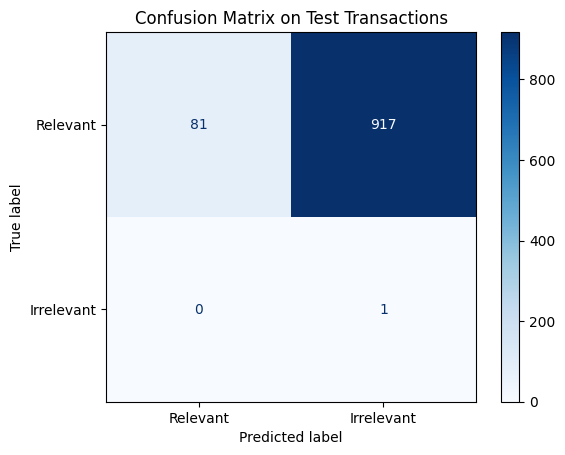

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = []
y_pred = []
for idx, row in test_transactions.items():
    present_items = set(test_transactions.loc[idx])
    actual_items = set(present_items)
    predicted_items = set()

    for _, rule in rules.iterrows():
        antecedents = set(rule['antecedents'])
        consequents = set(rule['consequents'])
        if antecedents.issubset(present_items):
            predicted_items |= consequents

    y_true.append(1 if len(actual_items) > 0 else 0)
    y_pred.append(1 if len(actual_items & predicted_items) > 0 else 0)

cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Relevant', 'Irrelevant'])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Transactions")
plt.show()
